<a href="https://colab.research.google.com/github/SaquibKhan-DS/Admission_predict/blob/main/notebook/Admission_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("/content/sample_data/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data = data.drop(['Research','University Rating'], axis =1)
data.head(5)

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,1,337,118,4.5,4.5,9.65,0.92
1,2,324,107,4.0,4.5,8.87,0.76
2,3,316,104,3.0,3.5,8.00,0.72
3,4,322,110,3.5,2.5,8.67,0.80
4,5,314,103,2.0,3.0,8.21,0.65


In [ ]:
x = data.drop(['Chance of Admit '], axis = 1)
y = data['Chance of Admit ']

In [ ]:
x.shape, y.shape

((400, 6), (400,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [ ]:
from sklearn.metrics import mean_absolute_error as mea
from sklearn.linear_model import LinearRegression as lr

In [ ]:
# lr = LinearRegression(normalize = True)
model = lr()
model.fit(train_x, train_y)
train_x.shape, train_y.shape,test_x.shape, test_y.shape

((300, 6), (300,), (100, 6), (100,))

In [ ]:
train_pred = model.predict(train_x)
k = mea(train_pred,train_y)
print('Test Mean Absolute error for Training Data : ', k)

Test Mean Absolute error for Training Data :  0.044927334304106475


In [ ]:
train_pred = model.predict(test_x)
k = mea(train_pred,test_y)
print('Test Mean Absolute error for Testing Data : ', k)

Test Mean Absolute error for Testing Data :  0.045603661364735225


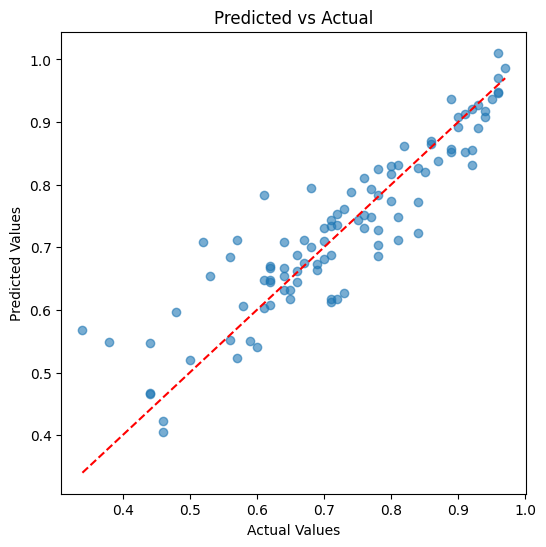

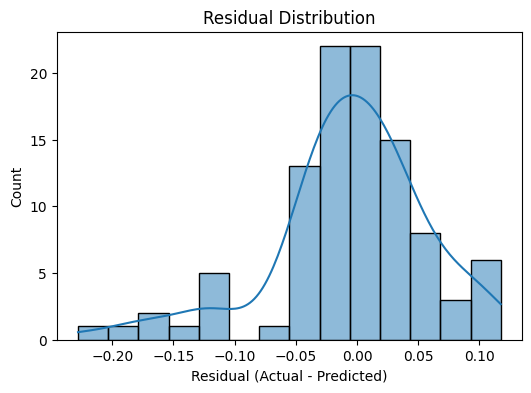

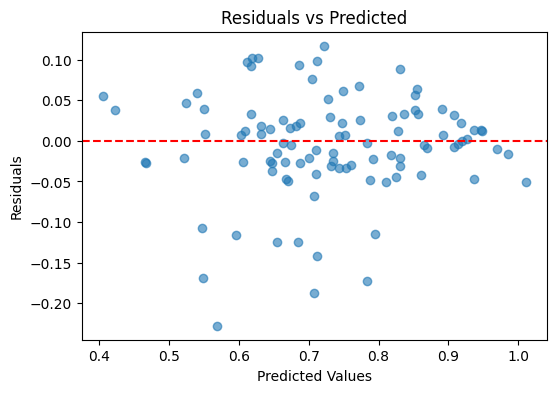

In [ ]:
# Predictions on test data
y_pred = model.predict(test_x)

# Residuals
residuals = test_y - y_pred

# 1. Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(test_y, y_pred, alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')  # ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

# 2. Plot residual distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residual Distribution")
plt.show()

# 3. Residuals vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [ ]:
# Predictions on test data
y_pred = model.predict(test_x)

# Calculate residuals
residuals = test_y - y_pred

# Put everything in a DataFrame for easy inspection
results = pd.DataFrame({
    'Actual': test_y,
    'Predicted': y_pred,
    'Residual': residuals,
    'Absolute Residual': np.abs(residuals)
})

# Sort by absolute residual (biggest errors first)
worst_cases = results.sort_values(by='Absolute Residual', ascending=False).head(10)

print(worst_cases)


     Actual  Predicted  Residual  Absolute Residual
92     0.34   0.567973 -0.227973           0.227973
10     0.52   0.708057 -0.188057           0.188057
66     0.61   0.783103 -0.173103           0.173103
91     0.38   0.549042 -0.169042           0.169042
103    0.57   0.712034 -0.142034           0.142034
63     0.56   0.684851 -0.124851           0.124851
387    0.53   0.654168 -0.124168           0.124168
186    0.84   0.722600  0.117400           0.117400
60     0.48   0.595921 -0.115921           0.115921
68     0.68   0.794634 -0.114634           0.114634


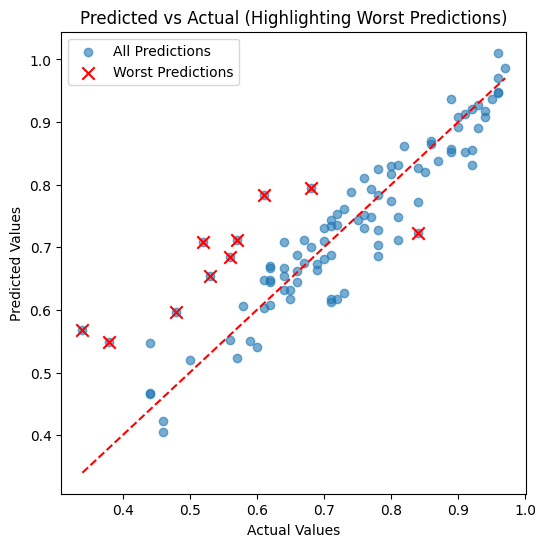

In [ ]:
# Normal scatter for all test data
plt.figure(figsize=(6,6))
plt.scatter(test_y, y_pred, alpha=0.6, label="All Predictions")

# Highlight the worst 10 cases (from your worst_cases DataFrame)
plt.scatter(worst_cases["Actual"], worst_cases["Predicted"],
            color='red', s=80, marker='x', label="Worst Predictions")

# Red dashed ideal line
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (Highlighting Worst Predictions)")
plt.legend()
plt.show()

The model performs well with a low MAE (~0.045) on both training and testing data, showing good generalization and no signs of overfitting.
Residuals are centered around zero with no patterns, confirming that the model captures the data effectively.
Overall, it is a reliable and accurate model suitable for prediction.